In [4]:
%pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 11.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 439.2/439.2 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.7 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 124.6/124.6 kB 3.7 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from tensorflow import keras

model = keras.models.load_model("best-cnn-model.h5")
model.layers

In [7]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [8]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.024405686 0.25504455


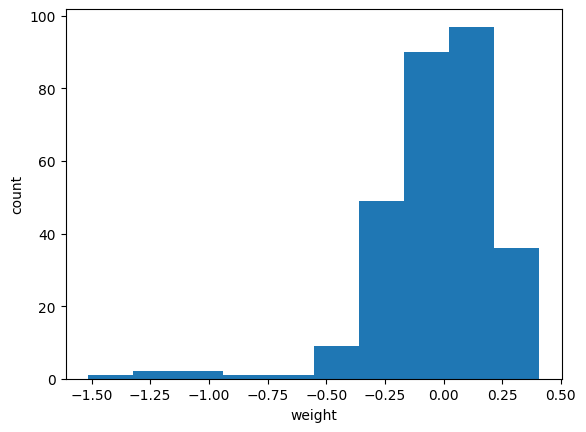

In [9]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

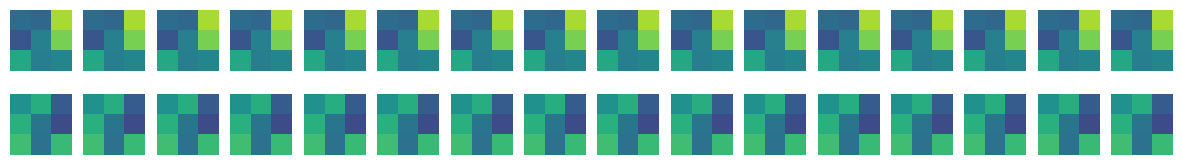

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2) :
    for j in range(16) :
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + i], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [11]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0024042248 0.07887989


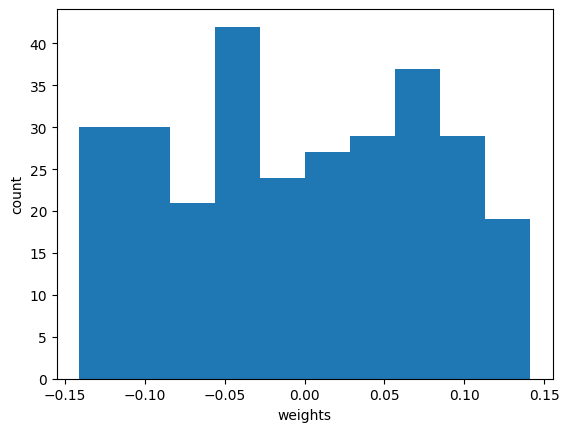

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

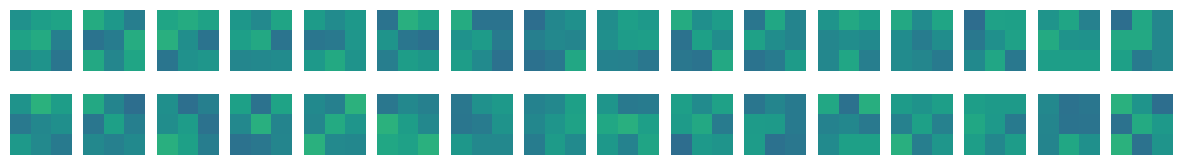

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2) :
    for j in range(16) :
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [16]:
print(model.input)
conv_acti = keras.Model(model.input, model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [17]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


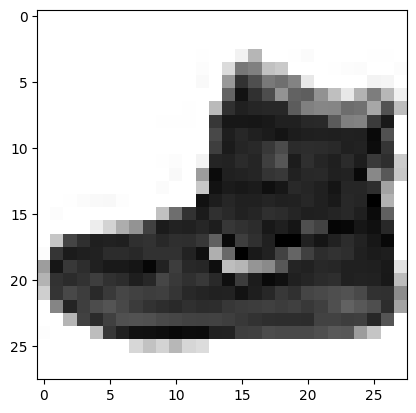

In [32]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [33]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 11ms/step
(1, 28, 28, 32)


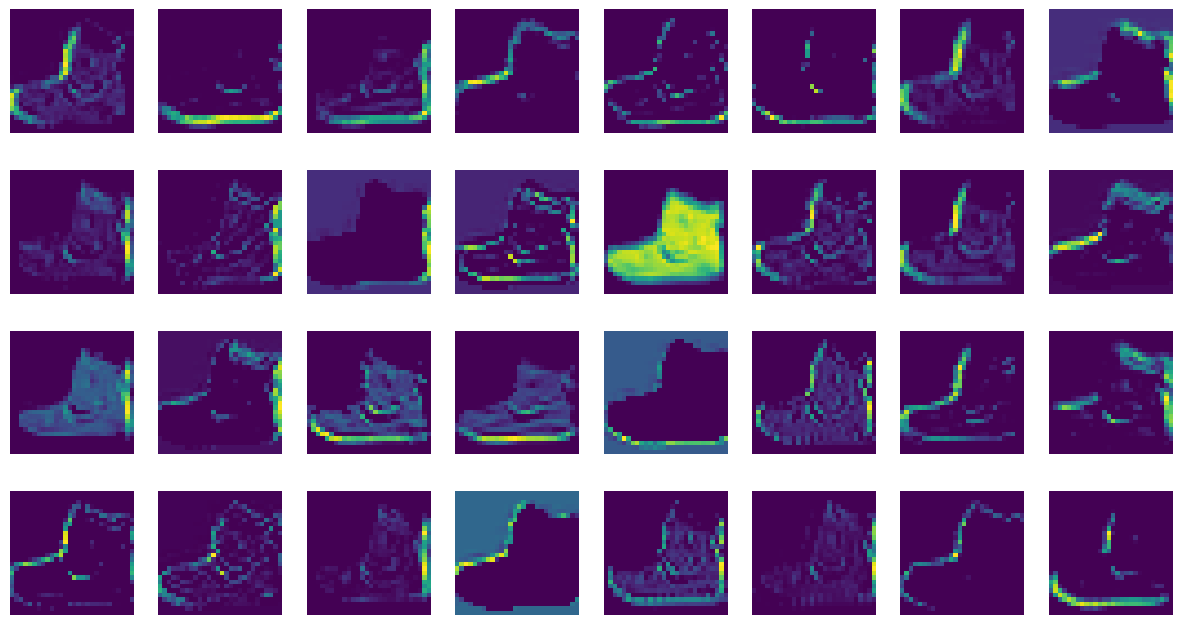

In [34]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4) :
    for j in range(8) :
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [35]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1) / 255.0)
print(feature_maps.shape)

1/1 [==============================] - 0s 27ms/step
(1, 14, 14, 64)


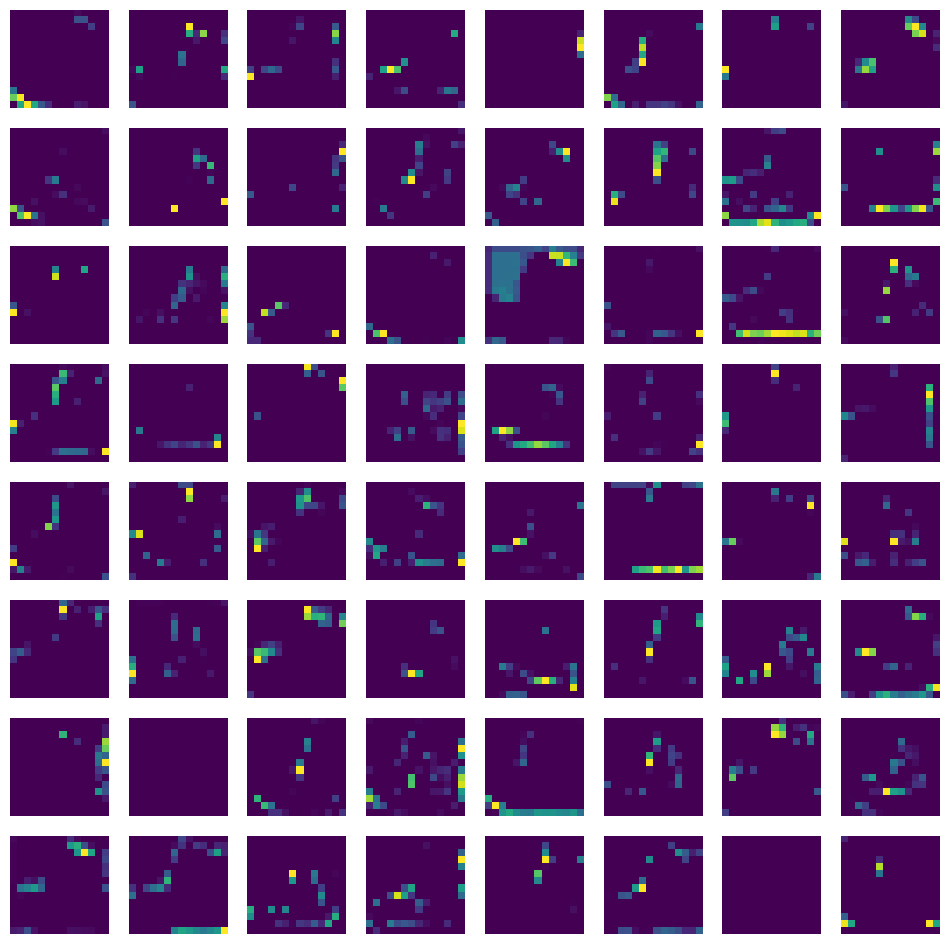

In [36]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8) :
    for j in range(8) :
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()